INSA ROUEN <br>
MS ESD 2019-2020 <br>
WINNIE VORIHILALA <br> 

# TP MACHINE LEARNING : SVM

Les machines à vecteurs de support ou séparateurs à vaste marge (en anglais support vector machine, SVM) sont un ensemble de techniques d'apprentissage supervisé destinées à résoudre des problèmes de discrimination (synonyme de classification) et de régression. Les SVM sont une généralisation des classifieurs linéaires.

Les séparateurs à vaste marge ont été développés dans les années 1990 à partir des considérations théoriques de Vladimir Vapnik sur le développement d'une théorie statistique de l'apprentissage : la théorie de Vapnik-Tchervonenkis. Ils ont rapidement été adoptés pour leur capacité à travailler avec des données de grandes dimensions, le faible nombre d'hyperparamètres, leurs garanties théoriques, et leurs bons résultats en pratique.

Les SVM ont été appliqués à de très nombreux domaines (bio-informatique, recherche d'information, vision par ordinateur, finance…). Selon les données, la performance des SVM est de même ordre, ou même supérieure, à celle d'un réseau de neurones ou d'un modèle de mélanges gaussiens.

Il a  été prouvé que dans la catégorie des classificateurs linéaires, les SVM sont ceux qui obtiennent les meilleurs résultats.

Un des autres avantages des SVM, est que ces derniers sont très efficaces quand on ne dispose que de peu de données d’entraînement : alors que d’autres algorithmes n’arriveraient pas à généraliser correctement, on observe que les SVM sont beaucoup plus efficaces. Cependant, quand les données sont trop nombreuses, le SVM a tendance à baisser en performance.

Fondamentalement, un SVM cherchera à trouver un hyperplan qui sépare les catégories de notre problème, peu importe le nombre de dimensions.

Sources : 
- https://zestedesavoir.com/tutoriels/1760/un-peu-de-machine-learning-avec-les-svm/ (notion très bien vulgarisée)
- http://eric.univ-lyon2.fr/~ricco/cours/slides/svm.pdf (détails mathématiques)
- https://fr.wikipedia.org/wiki/Machine_à_vecteurs_de_support#cite_note-2

## Chargement des librairies 

In [21]:
from __future__ import print_function
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd
import matplotlib as plt
import numpy as np

import scipy.io as sio #To load matlab file
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.model_selection import KFold

from sklearn import linear_model

from sklearn.metrics import confusion_matrix

%matplotlib inline


# 1- SVM Lineaire

# 1.1 - Prise en main 

# 1- Test du script

### Fonction de plot

In [1]:
# coding: utf-8

# # SVM Lineaire et non-lineaire
# Application sur les donnees jouet (voir Hastie et Tibshrani)

from __future__ import print_function
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import scipy.io as sio #To load matlab file
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

plt.close("all")


#%% Trace frontiere decision et marge
def plot_decision_margin_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # margin
    Z = classifier.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    cs = plt.contour(xx1, xx2, Z, levels=[-1, 0, 1], colors=['r', 'g', 'b'], linewidths=2.5)
    plt.clabel(cs)
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)

### Chargement des données d'apprentissage

In [2]:
#%% Dataset : Mixture of gaussian (disponible sur Moodle)
# Donnees apprentissage
data_a = sio.loadmat('./mixtureexampleTRAIN.mat') #data_a est de type dict
Xa, Ya = data_a['Xa'], data_a['Ya'][:,0]
print('\nCaractéristiques jeu apprentissage : ')
print('Nombre de points : {}'.format(Xa.shape[0]))
print('Nombre de variables : {}'.format(Xa.shape[1]))
print('Nombre de classes : {}'.format(len(np.unique(Ya))))
classes, nbpoints = np.unique(Ya, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))
print(" ")
print("L'ensemble de mes variables explicatives d'apprentissage Xa a pour dimension : ", Xa.shape)
print("Ma variable cible d'apprentissage Ya a pour dimension : ", Ya.shape)

dfXa = pd.DataFrame(Xa)
dfYa = pd.DataFrame(Ya)

print(" ")
print("Visualisation des 5 premières lignes de mon dataframe Xa")
print(dfXa.head())
print(" ")
print("Visualisation des 5 premières lignes de mon dataframe Ya")
print(dfYa.head())


Caractéristiques jeu apprentissage : 
Nombre de points : 1000
Nombre de variables : 2
Nombre de classes : 2
Classe -1 comprend 457 points
Classe 1 comprend 543 points
 
L'ensemble de mes variables explicatives d'apprentissage Xa a pour dimension :  (1000, 2)
Ma variable cible d'apprentissage Ya a pour dimension :  (1000,)
 
Visualisation des 5 premières lignes de mon dataframe Xa
     0     1
0 -1.7  0.90
1  0.8  1.40
2  2.1 -0.75
3  3.6 -1.75
4  0.2 -0.45
 
Visualisation des 5 premières lignes de mon dataframe Ya
   0
0 -1
1 -1
2  1
3  1
4  1


In [6]:
type(data_a)

dict

In [80]:
#data_a

In [10]:
#data_a['Ya']
print(len(data_a['Ya']))
print(len(data_a['Xa']))

1000
1000


### Chargement des données de test


In [11]:
# Donnees test
data_t = sio.loadmat('./mixtureexampleTEST.mat')
Xt, Yt = data_t['Xt'], data_t['Yt'][:,0]
print('\nCaractéristiques jeu de test : ')
classes, nbpoints = np.unique(Yt, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))
    
print(" ")
print("L'ensemble de mes variables explicatives de test Xt a pour dimension : ", Xt.shape)
print("Ma variable cible de test Yt a pour dimension : ", Yt.shape)


Caractéristiques jeu de test : 
Classe -1 comprend 94 points
Classe 1 comprend 107 points
 
L'ensemble de mes variables explicatives de test Xt a pour dimension :  (201, 2)
Ma variable cible de test Yt a pour dimension :  (201,)


### Découpage des données d'apprentissage en données d'apprentissage et validation

In [12]:
#%% Decoupage des donnees app en jeu de validation et app
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)

### Normalisation des données d'apprentissage, test et validation

In [13]:
#%% Normalisation
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

- with_mean boolean, True par défaut
Si True, centrez les données avant la mise à l'échelle. Cela ne fonctionne pas (et soulèvera une exception) lors d'une tentative sur des matrices clairsemées, car leur centrage implique la construction d'une matrice dense qui, dans les cas d'utilisation courants, est probablement trop grande pour tenir en mémoire.
- with_std boolean, True par défaut
Si la valeur est True, mettez les données à l'échelle de la variance unitaire (ou de manière équivalente, l'écart-type unitaire).

### Définition du modèle SVM Linéaire

##### Definition sklearn 

Sources : 
- https://translate.google.com/translate?hl=fr&sl=en&u=http://scikit-learn.org/stable/modules/svm.html&prev=search
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Les machines à vecteurs de support (SVM) sont un ensemble de méthodes d'apprentissage supervisé utilisées pour la classification , la régression et la détection des valeurs aberrantes.

Les avantages des machines à vecteurs de support sont:

- Efficace dans les espaces de grande dimension.
- Toujours efficace dans les cas où le nombre de dimensions est supérieur au nombre d'échantillons.
- Utilise un sous-ensemble de points d'apprentissage dans la fonction de décision (appelés vecteurs de support), il est donc également efficace en mémoire.
- Polyvalent: différentes fonctions du noyau peuvent être spécifiées pour la fonction de décision. Des noyaux communs sont fournis, mais il est également possible de spécifier des noyaux personnalisés.


Les inconvénients des machines à vecteurs de support sont les suivants:

- Si le nombre de fonctionnalités est beaucoup plus grand que le nombre d'échantillons, évitez de sur-ajuster dans le choix des fonctions du noyau et le terme de régularisation est crucial.
- Les SVM ne fournissent pas directement d'estimations de probabilité, celles-ci sont calculées en utilisant une validation croisée quintuple coûteuse (voir Scores et probabilités , ci-dessous).
- Les machines à vecteurs de support de scikit-learn prennent en charge à la fois des vecteurs d'échantillonnage denses ( numpy.ndarray et convertibles en ceux de numpy.asarray ) et clairsemés (tout scipy.sparse) en entrée. Cependant, pour utiliser un SVM pour faire des prédictions pour des données éparses, il doit avoir été ajusté sur ces données. Pour des performances optimales, utilisez numpy.ndarray (dense) ou scipy.sparse.csr_matrix (sparse) de type dtype=float64 avec dtype=float64 .

Dans sklearn : 
- SVC : sert à résoudre des problèmes de régression
- SVR : sert à résoudre des problèmes de classification

SVC , NuSVC et LinearSVC sont des classes capables d'effectuer une classification multi-classes sur un ensemble de données.

In [14]:
# definition du modele SVM Lineaire
paramC = 1 #toujours fixé à 1 ?
clf_svm = SVC(kernel='linear', C = paramC)
# apprentissage des parametres du SVM Lineaire sur le jeu d'apprentissage
clf_svm.fit(Xa, Ya)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

- kernel, prend par défaut la valeur 'rbf' (noyeu gaussien) est un paramètre où l'on spécifie le type de noyau que l'on veut
- C : paramètre de régularisation prenant par défaut la valeur 1. C doit être strictement positive. 

### Plot de la frontière de décision et de la marge

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


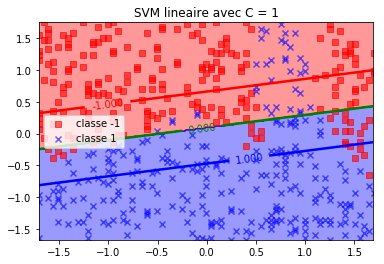

In [15]:
#%% Trace de la frontiere de decision et de la marge 
plot_decision_margin_2d(Xa, Ya, clf_svm, 0.02, titre='{} avec C = {}'.format("SVM lineaire", paramC))

Nous constatons à travers ce grapique que la frontière de décision sépare globalement bien nos données en 2, avec un petit pourcenage d'erreur que nous allons calculer ci-dessous.

### Calcul de l'erreur de classification

In [16]:
#%% Erreur de classification en test du SVM Lineaire obtenu
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
print('\nSVM Lineaire : erreur apprentissage = {}'.format(err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt))
print('SVM Lineaire : erreur test = {}'.format(err_test))


SVM Lineaire : erreur apprentissage = 0.132
SVM Lineaire : erreur test = 0.17412935323383083


Le taux d'erreur de classification obtenu sur nos données d'apprentissage est égal à 13%. <br>
Le taux d'erreur de classification obtenu sur nos données de test est égal à 17%. <br>

Ces taux d'erreur obtenus sont assez élevés. On peut par conséquent déduire qu'une séparation linéaire n'est pas la meilleure méthode pour séparer les données qu'on a a notre disposition. <br>
Onn constate également l'influence du paramètre C (paramètre de régulariation) sur la frontière de décision et la marge. <br>
Dans la partie ci-dessous, nous allons refaire la même méthode en faisant varier les aleurs du paramètre C.

# 2- Changer la frontière de décision et la marge lorsque C >> 1 et C << 1 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

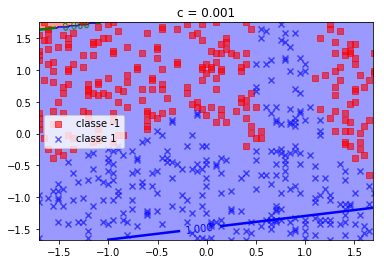

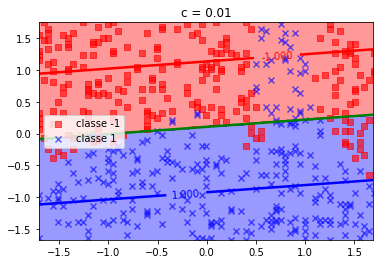

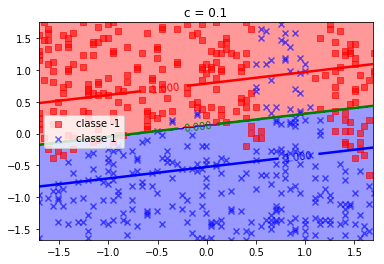

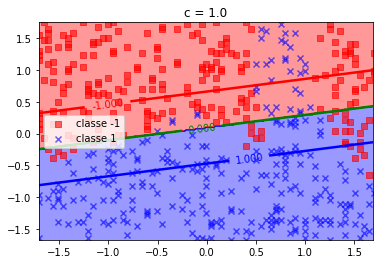

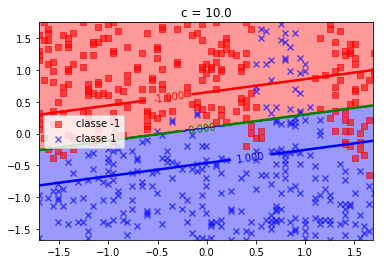

In [17]:
vectC = np.logspace(-3, 1, 5) 
for paramC in vectC:
   clf_svm.C = paramC
   clf_svm.fit(Xa, Ya)
   plot_decision_margin_2d(Xa, Ya, clf_svm, 0.02, titre="c = {}".
       format(paramC))

On peut déduire que plus C augmente, plus la frontière de décision sépare correctement nos données en 2 classes.

On remarque que pour des valeurs de C très petites ( 0.001
 ), la fontière de décision n'est pas du tout correct. Pour des valeurs de C de l'ordre de  0.01
 , la frontière de décision commence à se stabiliser mais la marge est grande. Finalement, plus C devient grand, plus la marge est petite mais pour des C plus grand que 1, la différence entre les marges est très petite.
On veut maintenant chercher à trouver le C optimal qui va permettre de donner les meilleurs résultats. La valeur de C sera choisie entre  0.001
  et  100
 . Pour chaque valeur de C, un modèle est appris sur les données d'apprentissage et testé sur les données de validation, les scores en classification sont stockés dans un tableau. Une fois toutes les valeurs de C testées, le C optimal est celui qui minimise l'erreur en classification sur les données de validation. Un graphique représentant l'évolution de l'erreur en classification en fonction de la valeur de C pour les données d'apprentissage et données de validation est ensuite affiché.

# 3- Détermination du meilleur paramètre C∗ en explorant la plage de valeurs {10^−3, · · · , 10^2}


 C optimal = 0.005179474679231213


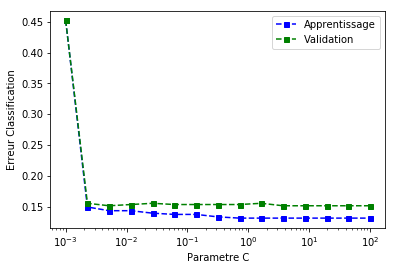

In [18]:
# Choix du C optimal par validation croisee
vectC = np.logspace(-3, 2, 15) 
err_val = np.empty(vectC.shape[0]) 
err_app = np.empty(vectC.shape[0]) 
for ind_C, C in enumerate(vectC) :
    clf_svm.C = C 
    clf_svm.fit(Xa, Ya)
    # calcule erreur sur les donnees de validation et app
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_svm.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
err_min_val, ind_min = err_val.min(), err_val.argmin() 
Copt = vectC[ind_min]
print("\n C optimal = {}".format(Copt))
# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, err_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, err_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")

Comme énoncé précemment, la frontière de décision pour des valeurs de C de l'ordre de  0.001 ne donnent pas de résultats corrects (45% d'erreur, en fait toutes les données sont attribuées à la même classe). Mais dès  C=0.05
 , l'erreur en classification se stabilise à environ 17% pour les données de validation, et environ 14% pour les données d'apprentissage.
La valeur de C optimale trouvée, il faut maintenant entraîner les données d'apprentissage avec un modèle SVM de paramètre C = C_optimal. Puis tester le modèle sur les données test.

# 4- Évaluation du modèle optimal correspondant à C∗ optimal sur les données d'apprentissage et de test

In [19]:
# Apprentissage modele optimal et evaluation
clf_svm.C = Copt
clf_svm.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
print("\nSVM Lineaire optimal : erreur apprentissage = {}".format( err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt))
print("SVM Lineaire optimal : erreur test = {}".format(err_test))


SVM Lineaire optimal : erreur apprentissage = 0.14400000000000002
SVM Lineaire optimal : erreur test = 0.17910447761194026


Nous constatons finalement que les taux d'erreurs de classification sont plus élevée avec la valeur de C optimal qu'avec la valeur arbitraire de C (=1) que nous avions défini initialement. <br> Finalement, la valeur par défaut du paramètre C (=1) donne de meilleurs scores.

# 1.2 - Extension aux données CTG et Mnist

## SVM linéaire sur les données CTGSimple

In [82]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV", "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values

#Fusion des classes 2 et 3
classe = 3
Y[np.in1d(Y, classe)] = 2


# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.3, stratify=Y)

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

## SVM linéaire sur les données CTGSimple avec KFold

Le C optimal est 1.638. 


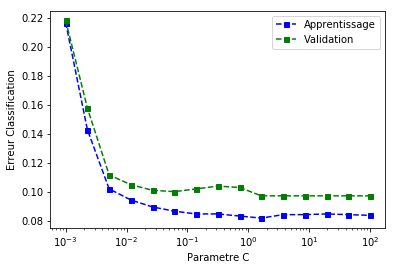

In [83]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
i = 1
paramC = 1

vectC = np.logspace(-3, 2, 15)

perf_val = [[], [], []]
perf_app = [[], [], []]

decoupage = 0

clf_svm = SVC(kernel='linear', C = paramC)

for train , valid in kf.split(Xa):
    X_train = Xa[train,:]
    Y_train = Ya[train]
    X_valid = Xa[valid,:]
    Y_valid = Ya[valid]
    
    for c in vectC :
        clf_svm.C = c
        clf_svm.fit(X_train, Y_train)
        perf_val[decoupage].append(1 - accuracy_score(Y_valid, clf_svm.predict(X_valid)))
        perf_app[decoupage].append(1 - accuracy_score(Y_train, clf_svm.predict(X_train)))
    decoupage += 1
    
perf_globale_val = np.zeros((len(vectC), 1))
perf_globale_app = np.zeros((len(vectC), 1))

for i in range(0, len(vectC)):
    perf_globale_val[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale_app[i] = perf_app[0][i] + perf_app[1][i] + perf_app[2][i]
    perf_globale_val[i] /= 3
    perf_globale_app[i] /= 3
    
c_opt = vectC[np.argmin(perf_globale_val)]
print('Le C optimal est %.3f. ' %c_opt)

# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, perf_globale_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, perf_globale_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")
plt.show()

## Apprentissage du modèle et évaluation du SVM

In [84]:
# Apprentissage modele optimal et evaluation SVM
clf_svm.C = 1.638
clf_svm.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
print("\nSVM Lineaire optimal : erreur apprentissage = {}".format(100*err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt))
print("SVM Lineaire optimal : erreur test = {}".format(100*err_test))

print("\n")
# Apprentissage modele optimal et evaluation Regression logistique
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
clf_reglog.C = 1.638
clf_reglog.fit(Xa, Ya)

print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))


SVM Lineaire optimal : erreur apprentissage = 8.933717579250722
SVM Lineaire optimal : erreur test = 9.717868338557988


Err classification en apprentissage correspondante = 9.029779058597498
Err classification en test correspondante = 9.561128526645767


On obtient un taux d'erreur de 8.62% avec le SVM linéaire.
On constate que la régression logistique donne une erreur de classification légèrement plus faible (8.46%) sur les données de test.

Affichons les matrices de confusion pour les deux méthodes.


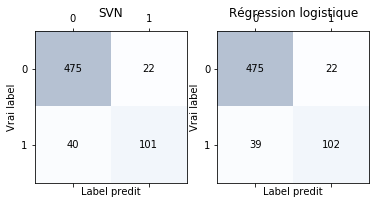

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


ypred_test_reglog = clf_reglog.predict(Xt)
ypred_test_svn = clf_svm.predict(Xt)

# matrices de confusion
confmat1 = confusion_matrix(y_true=Yt, y_pred=ypred_test_svn)
confmat2 = confusion_matrix(y_true=Yt, y_pred=ypred_test_reglog)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('SVN')

for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax2.text(x=j, y=i, s=confmat2[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('Régression logistique')

plt.show()

Le modèle SVM a classé 37 individus comme positifs alors qu'ils sont négatifs et 18 individus comme négatifs alors qu'ils sont positifs.
<br>
<br>
Le modèle de régression logistique a classé 37 individus comme positifs alors qu'ils sont négatifs et 17 individus comme négatifs alors qu'ils sont positifs.
<br>
<br>
On remarque que les 2 modèles ont des performances très proches 

# SVM linéaire sur les données Mnist

Nous allons maintenant utiliser le dataset MNIST. Cette fois nous ne sommes plus dans la classification binaire mais dans une classification multi classe car il y a 10 classes à prédire, les chiffres de 0 à 9. Nous utiliserons le même protocole que pour la régression logistique donc nous enlevons du modèle les variables ayant une faible variance. Cela permet de réduire le nombre de données et surtout de pouvoir comparer la méthode SVN avec les mêmes données que la régression logistique.

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


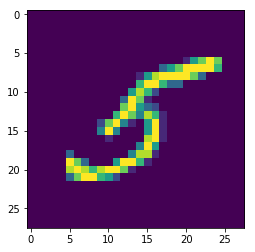

In [24]:
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

plt.imshow(Xa[35].reshape(28,28))

tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var] #On garde les données ayant une variance strictement supérieure à0.001 pour réduire la dimension des données
Xt = Xt[:, idx_var] #On garde les données ayant une variance strictement supérieure à0.001 pour réduire la dimension des données

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.8, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

On va maintenant utiliser une méthode de validation croisée pour trouver le C optimal.

0.001
0.0022758459260747888
0.005179474679231213
0.011787686347935873
0.02682695795279726
0.0610540229658533
0.13894954943731375
0.31622776601683794
0.7196856730011522
1.6378937069540647
3.7275937203149416
8.483428982440726
19.306977288832496
43.93970560760795
100.0

 C optimal = 0.0022758459260747888


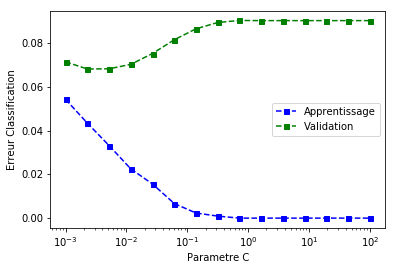

In [25]:
# Choix du C optimal par validation croisee
vectC = np.logspace(-3, 2, 15)
err_val = np.empty(vectC.shape[0])
err_app = np.empty(vectC.shape[0])
clf_svm = SVC(kernel='linear', cache_size = 1500)
for ind_C, C in enumerate(vectC):
    print(C)
    clf_svm.C = C
    clf_svm.fit(Xa, Ya)
    
    # calcule erreur sur les donnees de validation et app
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_svm.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
    
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]
print("\n C optimal = {}".format(Copt))

# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, err_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, err_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")
plt.show()

On alors trouvé le C optimal. Le graphique représentant l'évolution de l'erreur en classification sur les données test et validation montrent qu'à partir d'une valeur de C petite, l'erreur se stabilise. On remarque cependant un sur apprentissage, dû nottament au split entre le jeu de données d'apprentissage et le jeu de données de validation (12000 pour apprentissage).
Elaborons maintenant le modèle final avec le C optimal et regardons les résultats. Nous reprendrons également le modèle final obtenu avec la régression logistique lors du TP2 pour comparer les résultats.

In [26]:
Copt

0.0022758459260747888

In [27]:
# Apprentissage modele optimal et evaluation SVN
clf_svm = SVC(kernel='linear', cache_size = 1500) #creation du modele SVM
clf_svm.C = Copt #affectation de la valeur trouvée Copt au paramètre de régularisation C
clf_svm.fit(Xa, Ya) #entrainement du modèle SVM sur les données d'apprentissage
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa)) #calcul de l'erreur de classification sur les données d'apprentissage
print("\nSVM Lineaire optimal : erreur apprentissage = {}".format(100*err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt)) #calcul de l'erreur sur les données de test
print("SVM Lineaire optimal : erreur test = {}".format(100*err_test))

print("\n")

# Apprentissage modele optimal et evaluation Regression logistique
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs') #creation du modele de regression logistique
clf_reglog.C = 0.0023 #affectation de la valeur trouvée Copt au paramètre de régularisation C
clf_reglog.fit(Xa, Ya)#entrainement du modele d'apprentissage sur les données d'apprentissage

print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))


SVM Lineaire optimal : erreur apprentissage = 4.341666666666666
SVM Lineaire optimal : erreur test = 6.45


Err classification en apprentissage correspondante = 7.450000000000001
Err classification en test correspondante = 8.809999999999995


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


On obtient donc un score très satisfaisant sur l'échantillon test avec la SVM mais avec un temps de calcul très long... Alors que la régréssion logistique s'exécute très vite. Pour comparer les deux méthodes nous avons pris le même nombre de données, mais avec la régression logistique on aurait pu entraîner notre modèle sur les 60000 données assez rapidement ce qui aurait donné un meilleur résultat. <br>
Regardons maintenant les matrices de confusion.

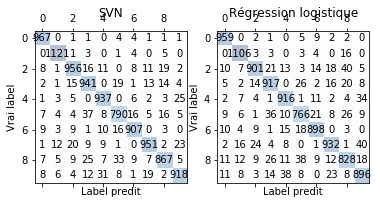

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


ypred_test_reglog = clf_reglog.predict(Xt) #on prédit tjr sur les données de test
ypred_test_svn = clf_svm.predict(Xt)

# matrices de confusion
confmat1 = confusion_matrix(y_true=Yt, y_pred=ypred_test_svn)
confmat2 = confusion_matrix(y_true=Yt, y_pred=ypred_test_reglog)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('SVN')

for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax2.text(x=j, y=i, s=confmat2[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('Régression logistique')

plt.show()

# SVM non-linéaire

Le script SimpleSVMKernel.py implémente un SVM avec un noyau gaussien de paramètre  $γ
  :  k(x,z)=exp(−γ‖x−z‖^2)$
 .
Dans un premier temps, on test le script et compare les résultats à ceux du SVM linéaire.


Dans un premier temps, on test le script et compare les résultats à ceux du SVM linéaire.


In [64]:
data_a = sio.loadmat('./mixtureexampleTRAIN.mat')
Xa, Ya = data_a['Xa'], data_a['Ya'][:,0]
print('\nCaractéristiques jeu apprentissage : ')
print('Nombre de points : {}'.format(Xa.shape[0]))
print('Nombre de variables : {}'.format(Xa.shape[1]))
print('Nombre de classes : {}'.format(len(np.unique(Ya))))
classes, nbpoints = np.unique(Ya, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))


# Donnees test
data_t = sio.loadmat('./mixtureexampleTEST.mat')
Xt, Yt = data_t['Xt'], data_t['Yt'][:,0]
print('\nCaractéristiques jeu de test : ')
classes, nbpoints = np.unique(Yt, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))

#%% Decoupage des donnees app en jeu de validation et app
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)


#%% Normalisation
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)


Caractéristiques jeu apprentissage : 
Nombre de points : 1000
Nombre de variables : 2
Nombre de classes : 2
Classe -1 comprend 457 points
Classe 1 comprend 543 points

Caractéristiques jeu de test : 
Classe -1 comprend 94 points
Classe 1 comprend 107 points


La méthode est la même que pour la partie précédente sauf qu'au lieu d'utiliser le kernel "linear", on utilise le kernel "rbf" qui correspond à un noyau gaussien. En plus du paramètre C, il y a maintenant un paramètre  γ
 . Ci-dessous, la fonction SVC avec le noyau gaussien est appelée avec C et gamma fixés à 1.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



SVM kernel : erreur apprentissage = 0.04200000000000004
SVM kernel : erreur test = 0.09452736318407962


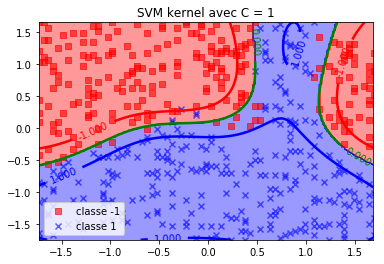

In [65]:
#%% 
# definition du modele SVM Lineaire
paramC = 1
paramKer = 1
clf_ker = SVC(kernel='rbf', C = paramC, gamma=paramKer)
# apprentissage des parametres du SVM Lineaire sur le jeu d'apprentissage
clf_ker.fit(Xa, Ya)

#%% Trace de la frontiere de decision et de la marge 
plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre='{} avec C = {}'.format("SVM kernel", paramC))


#%% Erreur de classification en test du SVM Lineaire obtenu
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print('\nSVM kernel : erreur apprentissage = {}'.format(err_app))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print('SVM kernel : erreur test = {}'.format(err_test))

On va maintenant fixer gamma à 1 mais faire varier C pour voir l'influence de C sur la frontière de décision et la marge.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

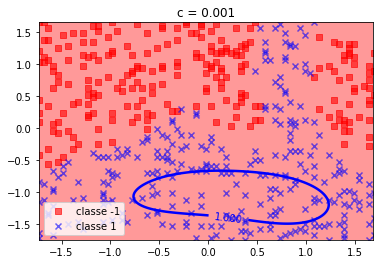

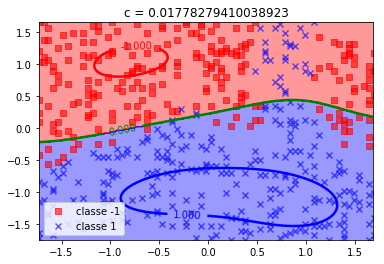

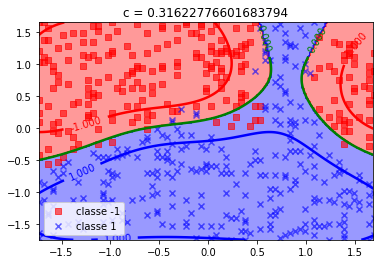

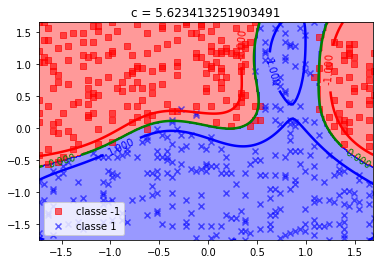

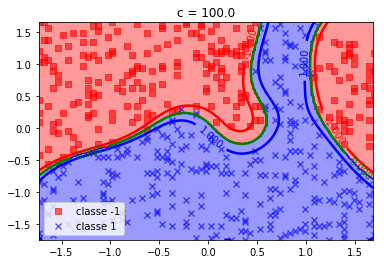

In [66]:
vectC = np.logspace(-3, 2, 5)
for paramC in vectC:
    clf_ker.C = paramC
    clf_ker.fit(Xa, Ya)
    plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre="c = {}".
    format(paramC))

On observe que plus C augmente, plus la marge diminue. La frontière de décision semble correct dès C = 0.3.

On va maintenant fixer C à 1 mais faire varier gamma pour voir l'influence de gamma sur lea frontière de décision et la marge.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

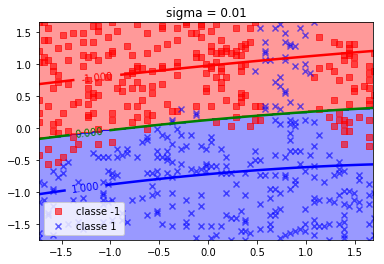

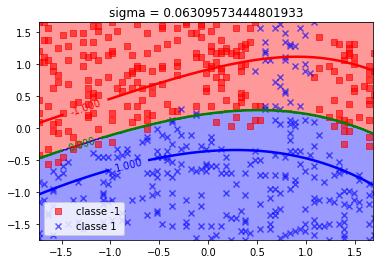

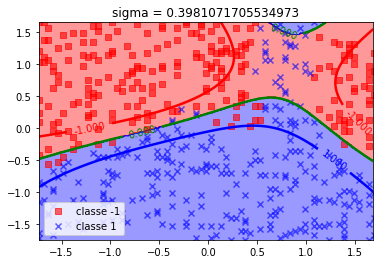

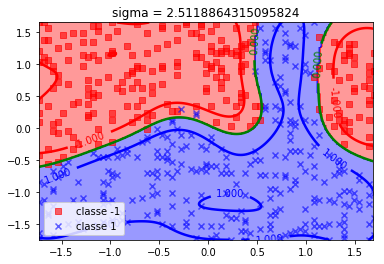

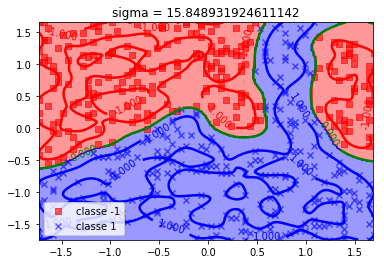

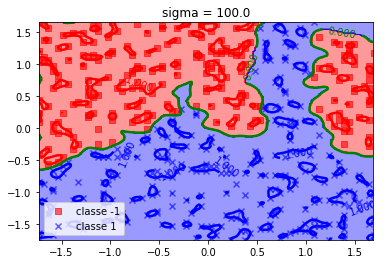

In [67]:
clf_ker.C = 1
vectGamma = np.logspace(-2, 2, 6)
for paramKer in vectGamma:
    clf_ker.gamma = paramKer
    clf_ker.fit(Xa, Ya)
    plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre="sigma = {}".format(paramKer))

On observe que plus sigma augmente, plus il y a du sur-apprentissage car la frontière devient de moins en moins lisse et la marge de plus en plus grande.


On a pu constater que la solution du SVM dépend des hyper-paramètres C et  γ
 . On va alors utiliser une recherche en grille qui consiste à explorer des plages pré-définies des hyper-paramètres et pour chaque paire (C,  γ
 ), on apprend le modèle SVM et on évalue ses performances sur les données de validation.

- Apprentissage du SVM pour C =  0.001 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.010 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.100 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  1.000 
	 Apprentissage du SVM pour gamma =   0.01 
	 Ap

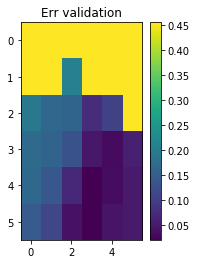

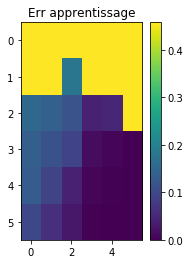

In [68]:
# Grid search (exploration des plages de valeurs de C et gamma)
vectC = np.logspace(-3, 2, 6)
vectGamma = np.logspace(-2, 2, 6)

err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))
err_app = np.empty((vectC.shape[0], vectGamma.shape[0]))

for ind_C, C in enumerate(vectC):
    print("- Apprentissage du SVM pour C = {:6.3f} ".format(C))
    clf_ker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        print("\t Apprentissage du SVM pour gamma = {:6.2f} ".format(paramKer))
        clf_ker.gamma = paramKer
        clf_ker.fit(Xa, Ya)
        err_val[ind_C, ind_gam] = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
        err_app[ind_C, ind_gam] = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
        
plt.subplot(121)
plt.imshow(err_val, aspect="auto")
plt.title("Err validation")
plt.colorbar()
plt.show()
plt.subplot(122)
plt.imshow(err_app, aspect="auto")
plt.title("Err apprentissage")
plt.colorbar()
plt.show()

In [69]:
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape) 
#np.unravl_index : convertit un index plat ou un tableau d'index plats en un tuple de tableaux de coordonnées.
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]
print("Gamma optimal : %f" %(GammaOpt))
print("C optimal : %f" %(Copt))

Gamma optimal : 2.511886
C optimal : 10.000000


Le gamma optimal est donc de 2.5 et le C optimal est de 10. On peut alors créer un modèle SVM non linéaire avec ces hyper paramètres optimaux.


In [70]:
# Apprentissage modele optimal et evaluation
clf_ker.C = Copt
clf_ker.gamma = GammaOpt

clf_ker.fit(Xa, Ya)

err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format(100*err_app))

err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*err_val))

err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 0.8000000000000007%
SVM kernel optimal : erreur validation = 2.0000000000000018%
SVM kernel optimal : erreur test = 3.482587064676612%


- INITIAL (avec Copt = 10) : On trouve donc un résultat en test de 0.99%, ce qui est largement mieux que pour la SVM linéaire où nous avions obtenu 17% d'erreur sur l'échantillon test. <br>
- avec Copt = 10, on trouve une erreur de classification de  3.48% <br>


# SVM avec noyau polynomial


Nous allons maintenant changer de noyau en prenant en prenant un noyau polynomial de degré d :  k(x,z)=(1+xTz)d
 . On applique la même méthode que précemment.
Le noyau polynomial de SKlearn est de la forme suivante :  (γxz+r)d
 . d est le degré, et r est le coef0 (paramètre de la fonction SVM). Dans notre cas  r=1
 .

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



SVM kernel : erreur apprentissage = 0.06000000000000005
SVM kernel : erreur test = 0.07960199004975121


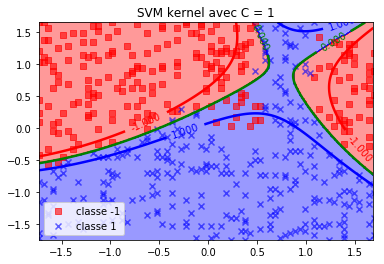

In [71]:
# definition du modele SVM Lineaire
paramC = 1
paramdegree = 3

clf_ker = SVC(kernel='poly', C = paramC, degree = paramdegree, coef0 = 1)
# apprentissage des parametres du SVM Lineaire sur le jeu d'apprentissage
clf_ker.fit(Xa, Ya)

#%% Trace de la frontiere de decision et de la marge 
plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre='{} avec C = {}'.format("SVM kernel", paramC))


#%% Erreur de classification en test du SVM Lineaire obtenu
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print('\nSVM kernel : erreur apprentissage = {}'.format(err_app))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print('SVM kernel : erreur test = {}'.format(err_test))

Utilisons une grid search pour trouver les paramètres C et d optimaux.

- Apprentissage du SVM pour C =  0.001 
	 Apprentissage du SVM pour degree =   1.00 
	 Apprentissage du SVM pour degree =   3.11 
	 Apprentissage du SVM pour degree =   5.22 
	 Apprentissage du SVM pour degree =   7.33 
	 Apprentissage du SVM pour degree =   9.44 
	 Apprentissage du SVM pour degree =  11.56 
	 Apprentissage du SVM pour degree =  13.67 
	 Apprentissage du SVM pour degree =  15.78 
	 Apprentissage du SVM pour degree =  17.89 
	 Apprentissage du SVM pour degree =  20.00 
- Apprentissage du SVM pour C =  0.010 
	 Apprentissage du SVM pour degree =   1.00 
	 Apprentissage du SVM pour degree =   3.11 
	 Apprentissage du SVM pour degree =   5.22 
	 Apprentissage du SVM pour degree =   7.33 
	 Apprentissage du SVM pour degree =   9.44 
	 Apprentissage du SVM pour degree =  11.56 
	 Apprentissage du SVM pour degree =  13.67 
	 Apprentissage du SVM pour degree =  15.78 
	 Apprentissage du SVM pour degree =  17.89 
	 Apprentissage du SVM pour degree =  20.00 
- Apprentissage du S

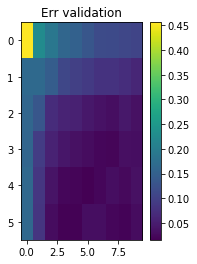

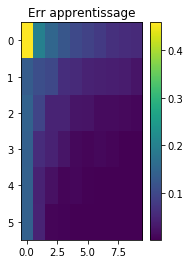

In [72]:
# Grid search (exploration des plages de valeurs de C et gamma)
vectC = np.logspace(-3, 2, 6)
vectd = np.linspace(1,20,10)

err_val = np.empty((vectC.shape[0], vectd.shape[0]))
err_app = np.empty((vectC.shape[0], vectd.shape[0]))

for ind_C, C in enumerate(vectC):
    print("- Apprentissage du SVM pour C = {:6.3f} ".format(C))
    clf_ker.C = C
    for ind_gam, paramD in enumerate(vectd):
        print("\t Apprentissage du SVM pour degree = {:6.2f} ".format(paramD))
        clf_ker.degree = paramD
        clf_ker.fit(Xa, Ya)
        err_val[ind_C, ind_gam] = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
        err_app[ind_C, ind_gam] = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
        
plt.subplot(121)
plt.imshow(err_val, aspect="auto")
plt.title("Err validation")
plt.colorbar()
plt.show()
plt.subplot(122)
plt.imshow(err_app, aspect="auto")
plt.title("Err apprentissage")
plt.colorbar()
plt.show()

In [73]:
ind_C, ind_degree = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
dOpt = vectd[ind_degree]
print("d optimal : %f" %(dOpt))
print("C optimal : %f" %(Copt))

d optimal : 11.555556
C optimal : 10.000000


Utilisons maintenant les paramètres optimaux pour créer notre modèle et regardons ses erreurs en classification.


In [74]:
# Apprentissage modele optimal et evaluation
clf_ker.C = Copt
clf_ker.degree = dOpt

clf_ker.fit(Xa, Ya)

err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format(100*err_app))

err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*err_val))

err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 0.40000000000000036%
SVM kernel optimal : erreur validation = 1.6000000000000014%
SVM kernel optimal : erreur test = 2.985074626865669%


Nous trouvons alors en test un taux d'erreur de 2.98%, ce qui est mieux que le SVN avec le noyau Gaussien (on avait obtenu 3.48%).

ATTENTION : EN PRINCIPE ON DEVRAIT RETROUVER UN MEILLEUR RESULTAT AVEC SVM à noyau poly + GridSearch pour trouver valeurs optimales de gamma et C. peut être nécessaire de refaire tourner code SVM avec noyau gaussien (rbf)

# 2.1 Extension du SVM non linéaire aux données CTG et MNIST¶


Nous allons mettre en oeuvre un SVM avec un noyau gaussien sur ces deux datasets. On cherchera les meilleurs hyper paramètres  C
  et  λ
 , puis nous élaborerons le modèle et comparerons les performances en classification avec celles du SVM linéaire.

In [86]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values 
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV", "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values

#Fusion des classes 2 et 3
classe = 3
Y[np.in1d(Y, classe)] = 2


# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.3, stratify=Y)

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

- Apprentissage du SVM pour C =  0.001 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.010 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.100 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  1.000 
	 Apprentissage du SVM pour gamma =   0.01 
	 Ap

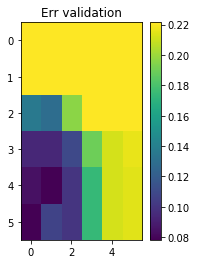

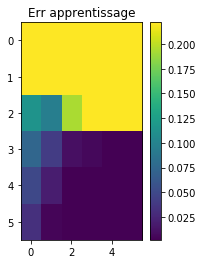

In [87]:
# Grid search (exploration des plages de valeurs de C et gamma)
clf_ker = SVC(kernel='rbf') #noyau gaussien

vectC = np.logspace(-3, 2, 6)
vectGamma = np.logspace(-2, 2, 6)

err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))
err_app = np.empty((vectC.shape[0], vectGamma.shape[0]))

for ind_C, C in enumerate(vectC):
    print("- Apprentissage du SVM pour C = {:6.3f} ".format(C))
    clf_ker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        print("\t Apprentissage du SVM pour gamma = {:6.2f} ".format(paramKer))
        clf_ker.gamma = paramKer
        clf_ker.fit(Xa, Ya)
        err_val[ind_C, ind_gam] = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
        err_app[ind_C, ind_gam] = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
        
plt.subplot(121)
plt.imshow(err_val, aspect="auto")
plt.title("Err validation")
plt.colorbar()
plt.show()
plt.subplot(122)
plt.imshow(err_app, aspect="auto")
plt.title("Err apprentissage")
plt.colorbar()
plt.show()

In [88]:
# C opt et Gamma opt
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]
print("Gamma optimal : %f" %(GammaOpt))
print("C optimal : %f" %(Copt))

Gamma optimal : 0.063096
C optimal : 10.000000


In [89]:
# Apprentissage modele optimal et evaluation
clf_ker.C = Copt
clf_ker.gamma = GammaOpt
clf_ker.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format
(100*err_app))
err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*
err_val))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 1.9212295869356355%
SVM kernel optimal : erreur validation = 7.829977628635342%
SVM kernel optimal : erreur test = 8.150470219435736%


On obtient alors de meilleurs résultats que pour la SVN linéaire qui avait donné 7.99% d'erreur en test et la regression linéaire qui avait donné 8.4% d'erreur en test.

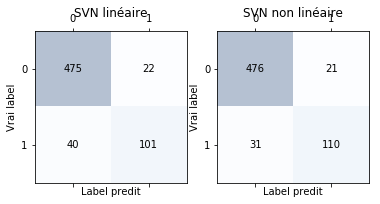

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


ypred_test_svn_gauss = clf_ker.predict(Xt)

# matrices de confusion
confmat3 = confusion_matrix(y_true=Yt, y_pred=ypred_test_svn_gauss)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat3, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('SVN linéaire')

for i in range(confmat3.shape[0]):
    for j in range(confmat3.shape[1]):
        ax2.text(x=j, y=i, s=confmat3[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('SVN non linéaire')

plt.show()

On constate qu'on obtient de meilleurs réultats avec SVM non-linéaire plutôt qu'avec SVM linéaire. Il y a beaucoup moins de faux negatifs (40 versus 31) et un peu moins de faux positifs également (21 versus 22).

# SVM non lineaire sur les données MNIST

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


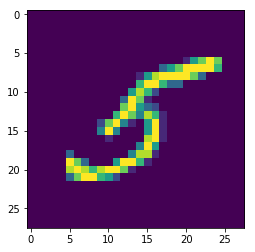

In [91]:
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

plt.imshow(Xa[35].reshape(28,28))

tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.7, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

 
On aurait pu chercher les paramètres optimaux comme précédemment, mais malheuresemnt le temps de calcul est vraiment trop long, même avec un nombre de données dans l'échantillon d'apprentissage de l'ordre de 10 000. Mais la méthode reste exactement la même avec la grid search. Finalement, nous prenons comme paramètres  C=5
  et  γ=0.005
 .

In [92]:
# Apprentissage modele optimal et evaluation
clf_ker = SVC(kernel='rbf',  cache_size = 1500)

clf_ker.C = 5
clf_ker.gamma = 0.005

clf_ker.fit(Xa, Ya)

err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format(100*err_app))

err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*err_val))

err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 0.0055555555555586444%
SVM kernel optimal : erreur validation = 8.299999999999997%
SVM kernel optimal : erreur test = 7.86%


On obtient alors un score de 7.86%. Notons que si on avait pris l'ensemble de l'échantillon d'apprentissage, on aurait eu un taux d'erreur d'environ 5%, ce qui est légèrement mieux que pour la SVM linéaire.